
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update implementation to work for mini-batch.


# Importing data and take a vision from it 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = '/content/sample_data/MultipleLR.csv - MultipleLR.csv.csv'
data = pd.read_csv(path, header=None, names=['x1', 'x2','x3','y'])
data.head()

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [ ]:
data.shape

(25, 4)

In [ ]:
cols = data.shape[1]   # number of features
datapoints=data.shape[0] 
print(datapoints)

25


In [ ]:
cols = data.shape[1]   # number of features
# save copy from data 
# x_data2 = data.iloc[: , 0:cols-1]
print(cols)
X = data.iloc[: , 0:cols-1]
Y = data.iloc[: , cols-1:cols]
X.insert(0, 'Ones', 1)
X=  np.matrix(X.values)
Y = np.matrix (Y.values)


4


### Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.

In [ ]:

def Batch_MultiVarAdam(data,theta, B1,B2,eps,learning_rate,iterations ):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    data=data.to_numpy()
    np.random.shuffle(data)
    X = data[: , 0:cols-1]
    Y = data[: , cols-1:cols]
    tmp=np.ones(X.shape[0])
    tmp=tmp.reshape(-1,1)
    X=np.concatenate((tmp,X),axis=1)
    n = X.shape[1]
    hypothesis = []
    VT = np.zeros((n,1))
    mt=np.zeros((n,1))
    m = len(Y)
    cost_history =[]
    list_theta=[]
    # theta_all=np.array(theta.reshape(1,-1))
    # theta_all
    
    for i in range(iterations):


      list_theta.append(theta)
        # prediction 
      pred =  X @theta.T

      hypothesis.append(pred)
        
        # compute erorr
        
      error = pred - Y

        # compute cost function 
      J = (error.T @ error)/(2*len(X))

#         J=compute_cost(X,Y,Theta)
      cost_history.append( J[0,0] )

        #compute gradient

      gradient = (X.T @ error)/len(X)
#         bias correction
        
      mt = (B1 * mt) + (1-B1) * gradient
      VT = (B2 * VT) + (1-B2) * np.power(gradient,2)
    
      mt_hat = mt/(1-np.power(B1,i+1))
      vt_hat = VT/(1-np.power(B2,i+1))     
#         mt_hat = mt/(1-(B1))
#         vt_hat = VT/(1-(B2))
        
    
    #Update thetas


      theta = theta - ((learning_rate * mt_hat)/((np.sqrt(vt_hat))+ eps)).T

      if i>0:
# Apply the stop conditions (gradient < 0.001 and cost convergence check). 

        if(np.abs(cost_history[i-1] - cost_history[i]) < 0.001):
            break
        elif ( np.linalg.norm(gradient)  < 0.001):
            break
            
                
        
              
    return theta ,np.array(list_theta).reshape(-1,4), np.array(cost_history).reshape(-1,1) , hypothesis

In [ ]:
tht = np.matrix(np.zeros(cols).reshape(1,cols))
eps = 0.01
# learnRate = 0.09
learnRate =0.02

B1 = 0.9
B2 = 0.999
iterations = 500
Batch_theta ,Batch_list_theta ,Batch_Cost_List , Batch_hypothesis =Batch_MultiVarAdam(data,tht, B1,B2,eps,learnRate,iterations )

In [ ]:
# Cost_List
Batch_Cost_List.shape

(130, 1)

In [ ]:
Batch_theta.shape

(1, 4)

# 4. You must plot the following curves.
    - Loss vs. iterations.
    - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration With BatchGD.')

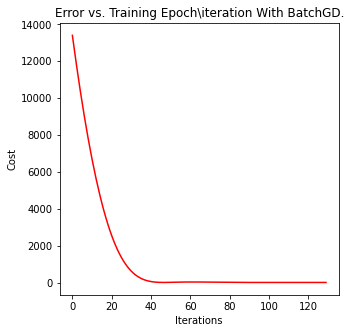

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( Batch_Cost_List, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration With BatchGD.')


In [ ]:
list_theta = np.array(Batch_list_theta)
theta0= list_theta[: , 0].reshape(-1,1)
theta1 = list_theta[: , 1].reshape(-1,1)
theta2=list_theta[: , 2].reshape(-1,1)
theta3=list_theta[: , 3].reshape(-1,1)


Text(0, 0.5, 'Cost')

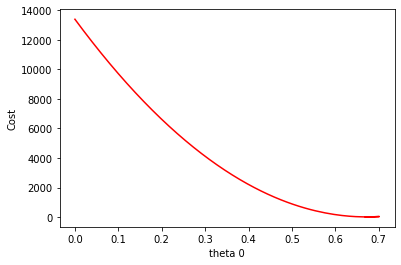

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta0, Batch_Cost_List ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

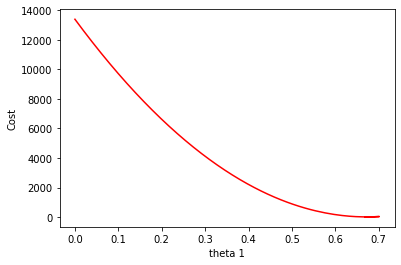

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta1, Batch_Cost_List ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

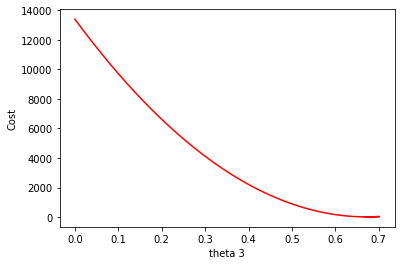

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta2, Batch_Cost_List ,'r' )

ax.set_xlabel('theta 3')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

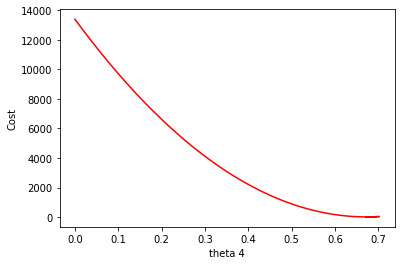

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta3, Batch_Cost_List ,'r' )

ax.set_xlabel('theta 4')
ax.set_ylabel('Cost')



#  You must obtain r2-score > 0.9 using each functiion.

In [ ]:
# 
from sklearn.metrics import r2_score

# print(X.shape , Batch_theta.shape)
ypred_Batch= X @ Batch_theta.T 
# print(Y.shape , ypred.shape)

print( "Model Accuracy Score With Batch Data is  : \t " , r2_score(Y,ypred_Batch))

Model Accuracy Score With Batch Data is  : 	  0.978368849319744


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


# Update your implementation to work for mini-batch.

In [ ]:

def MultiVarAdamMini(data,theta, B1,B2,eps,learning_rate,iterations,batch_size ):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    data=data.to_numpy()
    np.random.shuffle(data)
    X = data[: , 0:cols-1]
    Y = data[: , cols-1:cols]
    tmp=np.ones(X.shape[0])
    tmp=tmp.reshape(-1,1)
    X=np.concatenate((tmp,X),axis=1)
    n = X.shape[1]
    hypothesis = []
    VT = np.zeros((n,1))
    mt=np.zeros((n,1))
    m = len(Y)
    cost_history =[]
    n_batches = int(m/batch_size)
    list_theta=[]
    # theta_all=np.array(theta.reshape(1,-1))
    # theta_all
    
    for it in range(iterations):
        cost =0.0
        # initialize x with the cost of all epoch
        z=0
        if it>1:
            z=cost_history[-1]
        # randomize data before every batch 
        indices = np.random.permutation(m)

        X = X[indices]
        Y = Y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = Y[i:i+batch_size] 
            pred =  X_i @ theta.T
            hypothesis.append(pred)
            # compute erorr 
            error = pred - y_i
            # compute cost function 
            J = (error.T @ error)/(2*len(X_i))
            cost_history.append( J[0,0] )

#compute gradient
            gradient = (X_i.T @ error)/len(X_i)
            # print(("gradient" , gradient.shape))

#bias correction
        
            mt = (B1 * mt) + (1-B1) * gradient
            VT = (B2 * VT) + (1-B2) * np.power(gradient,2)
        
            mt_hat = mt/(1-np.power(B1,i+1))
            vt_hat = VT/(1-np.power(B2,i+1))         


    #Update thetas
            # pla= ((learning_rate * mt_hat)/((np.sqrt(vt_hat))+ eps)) 
            # print("pla" , pla.shape)
            theta = theta - ((learning_rate * mt_hat)/((np.sqrt(vt_hat))+ eps)).T
            # print(theta.shape)
            list_theta.append(theta)
        if it>1:
          if(np.abs(cost_history[-1] -z) < 0.1):
          # if(np.abs(cost_history[it-1] - cost_history[it]) < 0.1):
              break
          elif ( np.linalg.norm(gradient)  < 0.01):
              break
              
    return theta ,np.array(list_theta).reshape(-1,4), np.array(cost_history).reshape(-1,1) , hypothesis

# First Try with Mini batch start Thetas with Zeros 

In [ ]:
tht = np.matrix(np.zeros(cols).reshape(1,cols))
eps = 0.01
# learnRate = 0.09
learnRate =0.09

B1 = 0.9
B2 = 0.99
iterations = 500
batch_size=4
theta ,list_theta ,Cost_List , hypothesis =MultiVarAdamMini(data,tht, B1,B2,eps,learnRate,iterations, batch_size  )

In [ ]:
# tht=np.array([0.9,0.9,0.9,0.9]).reshape(1,-1)
# tht.shape


In [ ]:
# Cost_List
Cost_List.shape

(210, 1)

In [ ]:
theta

matrix([[0.67385562, 0.65387002, 0.64755946, 0.72148944]])

# 4. You must plot the following curves.
    - Loss vs. iterations.
    - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration With Min batch of data.')

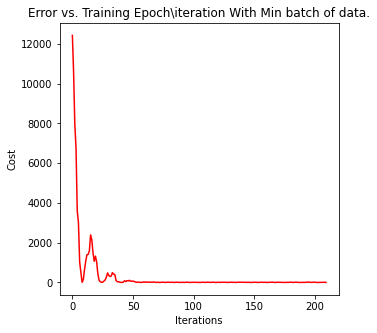

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( Cost_List, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration With Min batch of data.')


In [ ]:
list_theta = np.array(list_theta)
theta0= list_theta[: , 0].reshape(-1,1)
theta1 = list_theta[: , 1].reshape(-1,1)
theta2=list_theta[: , 2].reshape(-1,1)
theta3=list_theta[: , 3].reshape(-1,1)


Text(0, 0.5, 'Cost')

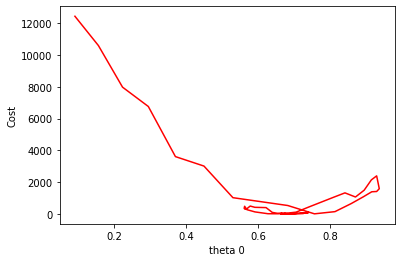

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta0, Cost_List ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

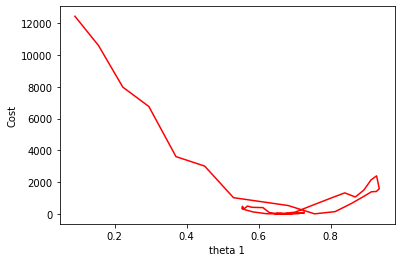

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta1, Cost_List ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

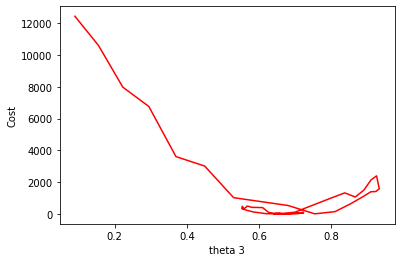

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta2, Cost_List ,'r')

ax.set_xlabel('theta 3')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

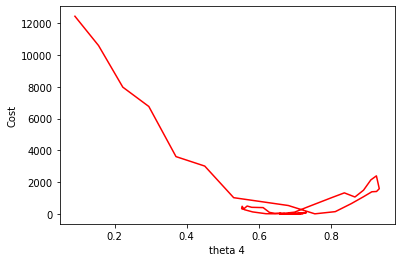

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta3, Cost_List ,'r' )

ax.set_xlabel('theta 4')
ax.set_ylabel('Cost')



#  You must obtain r2-score > 0.9 using each functiion.

In [ ]:
# 
from sklearn.metrics import r2_score

print(X.shape , theta.shape)
ypred= X @ theta.T 
print(Y.shape , ypred.shape)

print( "Model Accuracy Score  With mini Batch of data is  : \t " , r2_score(Y,ypred))

(25, 4) (1, 4)
(25, 1) (25, 1)
Model Accuracy Score  With mini Batch of data is  : 	  0.9797980893031288


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


# Second Try with inialize theta with 0,5

In [ ]:
# tht = np.matrix(np.zeros(cols).reshape(1,cols))
tht=np.array([0.5,0.5,0.5,0.5]).reshape(1,-1)
eps = 0.01
# learnRate = 0.09
learnRate =0.01

B1 = 0.9
B2 = 0.99
iterations = 500
batch_size=4
theta ,list_theta ,Cost_List , hypothesis =MultiVarAdamMini(data,tht, B1,B2,eps,learnRate,iterations, batch_size  )

In [ ]:
# tht=np.array([0.9,0.9,0.9,0.9]).reshape(1,-1)
# tht.shape


In [ ]:
# Cost_List
Cost_List.shape

(294, 1)

In [ ]:
theta

array([[0.66442792, 0.65956915, 0.65722033, 0.70132279]])

# 4. You must plot the following curves.
    - Loss vs. iterations.
    - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).

Text(0.5, 1.0, 'Error vs. Training Epoch\\iteration With Min batch of data.')

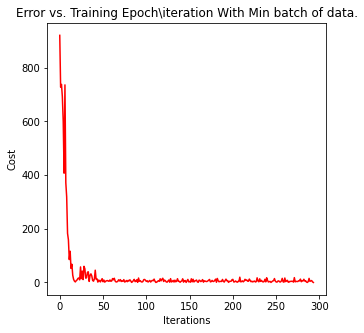

In [ ]:
# draw error graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot( Cost_List, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch\iteration With Min batch of data.')


In [ ]:
list_theta = np.array(list_theta)
theta0= list_theta[: , 0].reshape(-1,1)
theta1 = list_theta[: , 1].reshape(-1,1)
theta2=list_theta[: , 2].reshape(-1,1)
theta3=list_theta[: , 3].reshape(-1,1)


Text(0, 0.5, 'Cost')

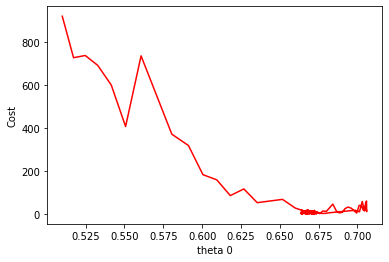

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta0, Cost_List ,'r')

ax.set_xlabel('theta 0')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

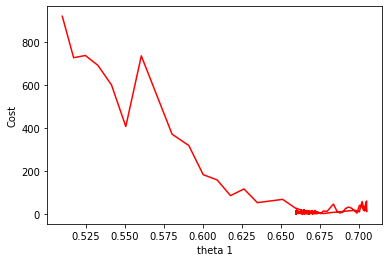

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta1, Cost_List ,'r')

ax.set_xlabel('theta 1')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

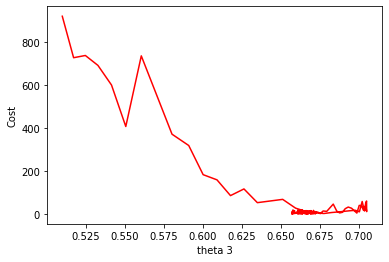

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta2, Cost_List ,'r')

ax.set_xlabel('theta 3')
ax.set_ylabel('Cost')



Text(0, 0.5, 'Cost')

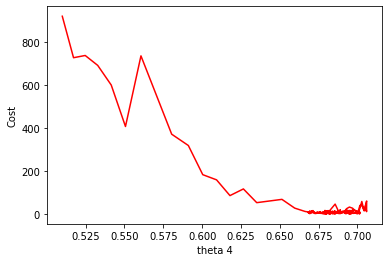

In [ ]:
fig,ax = plt.subplots()
ax.plot(theta3, Cost_List ,'r' )

ax.set_xlabel('theta 4')
ax.set_ylabel('Cost')



#  You must obtain r2-score > 0.9 using each functiion.

In [ ]:
# 
from sklearn.metrics import r2_score

print(X.shape , theta.shape)
ypred= X @ theta.T 
print(Y.shape , ypred.shape)

print( "Model Accuracy Score  With mini Batch of data is  : \t " , r2_score(Y,ypred))

(25, 4) (1, 4)
(25, 1) (25, 1)
Model Accuracy Score  With mini Batch of data is  : 	  0.9795062913132538


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
